Takwa Ben Radhia

# Classification d’images bruitées de chiffres

Import de bibliothèques

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
import seaborn as sns
import sklearn.metrics

Import des images

In [ ]:
train_images = np.load("train_images.npy")
train_labels = np.load("train_labels.npy")
test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")

Affichage des images

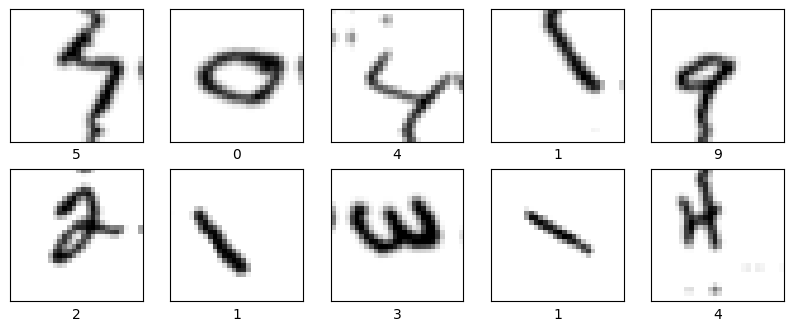

In [ ]:
plt.figure(figsize=[10,10])

for i in range(10):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

plt.show()

Préparation des échantillons test et validation

In [ ]:
num_pixels = train_images.shape[1] * train_images.shape[2]
num_classes = 10

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
test_images /= 255
train_images = train_images.reshape(train_images.shape[0], num_pixels)
test_images = test_images.reshape(test_images.shape[0], num_pixels)
# One hot encoding the target labels
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
# shuffle the data
ns =  train_images.shape[0] #number of examples
np.random.seed(12)
shuffle_index = np.random.permutation(ns)
train_images, train_labels = train_images[shuffle_index,:], train_labels[shuffle_index,]

## Modèle Deep Neural Network

In [ ]:
def model_dnn():
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(.3))

  model.add(Dense(256, kernel_initializer='normal', activation='relu'))
  model.add(Dense(128, kernel_initializer='normal', activation='relu'))

  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  optimizer = RMSprop(learning_rate=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  model.summary()
  return model

### Entrainement et évaluation

In [ ]:
model_dnn = model_dnn()
history = model_dnn.fit(train_images, train_labels, validation_split=0.2, epochs=10, batch_size=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 850,586 (3.24 MB)

 Trainable params: 850,586 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.3043 - loss: 1.9310 - val_accuracy: 0.6528 - val_loss: 1.0778
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.6445 - loss: 1.0664 - val_accuracy: 0.7509 - val_loss: 0.7808
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7386 - loss: 0.7966 - val_accuracy: 0.7851 - val_loss: 0.6768
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7855 - loss: 0.6638 - val_accuracy: 0.8017 - val_loss: 0.6128
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.8142 - loss: 0.5716 - val_accuracy: 0.8249 - val_loss: 0.5432
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8382 - loss: 0.5028 - val_accuracy: 0.8322 - val_loss: 0.5361
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8560 - loss: 0.4444 - val_accuracy: 0.8441 - val_loss: 0.4933
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8696 - loss: 0.4058 - v

In [ ]:
scores_train = model_dnn.evaluate(train_images, train_labels)
scores = model_dnn.evaluate(test_images, test_labels)
print("Neural network train accuracy: %.2f%%" % (scores_train[1]*100))
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9379 - loss: 0.1916
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0912 - loss: 2.9845
Neural network train accuracy: 92.34%
Neural network accuracy: 8.92%


### Performances

Accuracy et loss

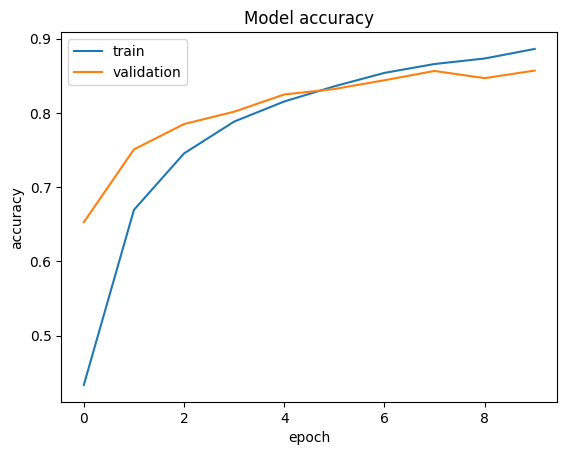

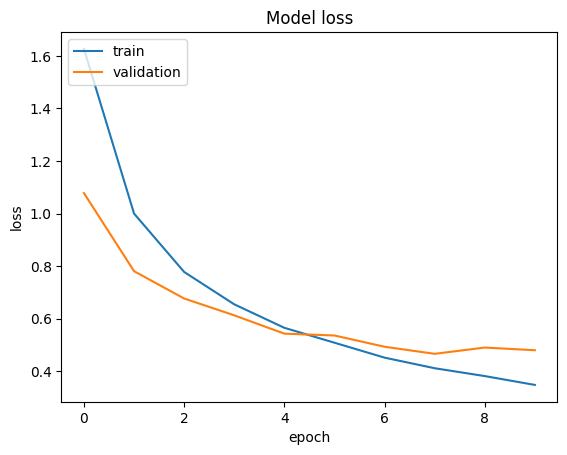

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Matrice de confusion

In [ ]:
y_pred = model_dnn.predict(test_images)
y_pred_classes = np.argmax(y_pred,axis = 1)

y_test_classes = np.argmax(test_labels,axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Axes: >

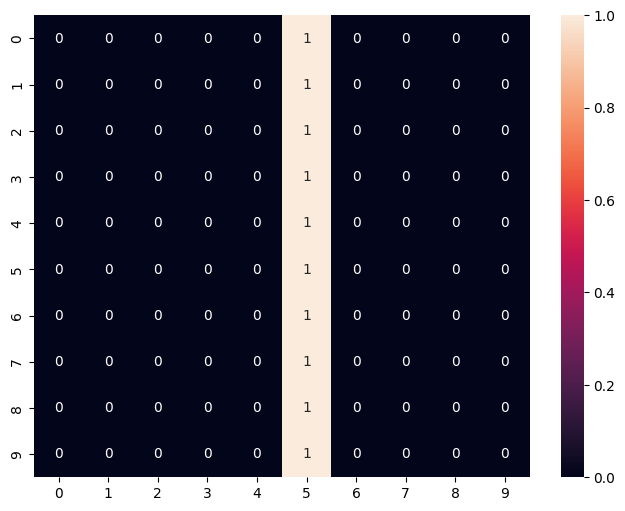

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(sklearn.metrics.confusion_matrix(y_test_classes, y_pred_classes, normalize="true"), annot=True)

## Modèle Deep Neural Network amélioré

### Entrainement et évaluation

In [ ]:
def model_dnn2():
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(.3))
  model.add(BatchNormalization())
  model.add(Dense(256, kernel_initializer='normal', activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(128, kernel_initializer='normal', activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

In [ ]:
model_dnn2 = model_dnn2()
history_dnn2 = model_dnn2.fit(train_images, train_labels, validation_split=0.2,
                              epochs=50,
                              batch_size=100,
                              callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 855,258 (3.26 MB)

 Trainable params: 852,922 (3.25 MB)

 Non-trainable params: 2,336 (9.12 KB)

Epoch 1/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.3855 - loss: 1.7627 - val_accuracy: 0.6730 - val_loss: 0.9879
Epoch 2/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6772 - loss: 0.9693 - val_accuracy: 0.7529 - val_loss: 0.7649
Epoch 3/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7434 - loss: 0.7755 - val_accuracy: 0.7898 - val_loss: 0.6483
Epoch 4/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.7842 - loss: 0.6534 - val_accuracy: 0.8025 - val_loss: 0.5991
Epoch 5/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8045 - loss: 0.5838 - val_accuracy: 0.8239 - val_loss: 0.5463
Epoch 6/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8233 - loss: 0.5267 - val_accuracy: 0.8346 - val_loss: 0.5190
Epoch 7/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8420 - loss: 0.4722 - val_accuracy: 0.8347 - val_loss: 0.5138
Epoch 8/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8498 - loss: 0.4421 - 

In [ ]:
scores_train = model_dnn2.evaluate(train_images, train_labels)
scores = model_dnn2.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores_train[1]*100))
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9715 - loss: 0.0955
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1359 - loss: 2.7671
Neural network accuracy: 95.49%
Neural network accuracy: 13.16%


### Performances

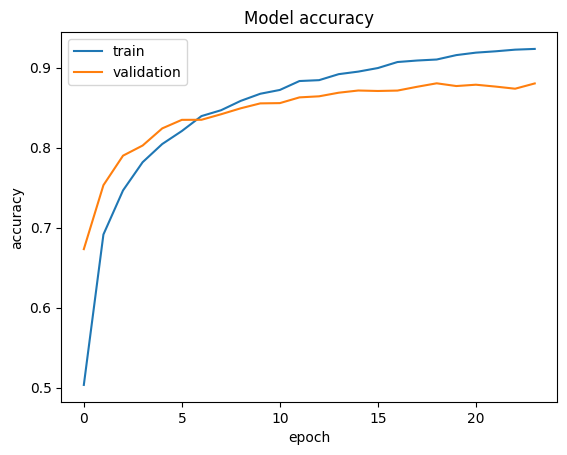

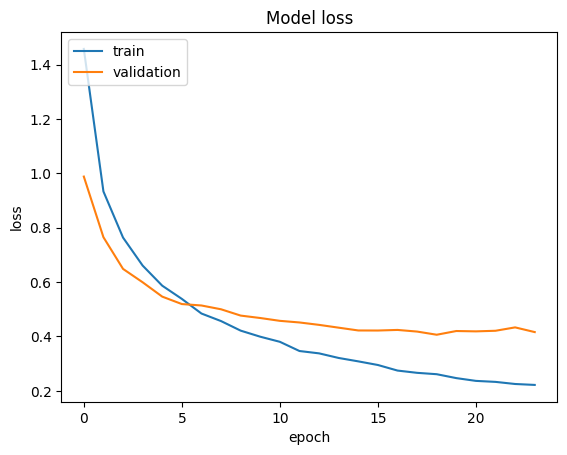

In [ ]:
#  "Accuracy"
plt.plot(history_dnn2.history['accuracy'])
plt.plot(history_dnn2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history_dnn2.history['loss'])
plt.plot(history_dnn2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred2 = model_dnn2.predict(test_images)
y_pred_classes2 = np.argmax(y_pred2,axis = 1)

y_test_classes2 = np.argmax(test_labels,axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<Axes: >

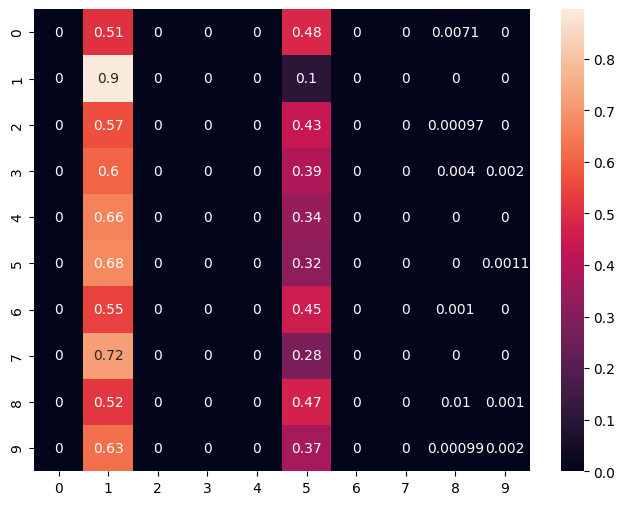

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(sklearn.metrics.confusion_matrix(y_test_classes2, y_pred_classes2, normalize="true"), annot=True)

Pour améliorer les performances de ce réseau, j'ai modifié plusieurs paramètres dont le learning rate, le batch size. J'ai aussi rajouté et retiré des couches denses et rajouté des dropout. Toutes ces modifications n'ont pas changé les performances du réseau. J'ai aussi rajouté des regularisations l1 et l2 mais elles ont empiré les performances. Le changement d'optimiseur n'a pas non plus changé grand chose. Seul l'augmentation du nombre d'epoch et la normalisation des batch ont permis l'amélioration des performances.

## Modèle Convulational Neural Network

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
def model_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = RMSprop(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
model_cnn = model_cnn()
history = model_cnn.fit(train_images, train_labels, validation_split=0.2, epochs=10, batch_size=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.3088 - loss: 1.9720 - val_accuracy: 0.5119 - val_loss: 1.4411
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.5394 - loss: 1.3763 - val_accuracy: 0.5796 - val_loss: 1.2838
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.5904 - loss: 1.2374 - val_accuracy: 0.6081 - val_loss: 1.1974
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.6281 - loss: 1.1505 - val_accuracy: 0.6062 - val_loss: 1.1863
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.6500 - loss: 1.0904 - val_accuracy: 0.6420 - val_loss: 1.1107
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.6714 - loss: 1.0406 - val_accuracy: 0.6488 - val_loss: 1.0851
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.6896 - loss: 0.9917 - val_accuracy: 0.6528 - val_loss: 1.0757
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.7009 - loss: 0.9634 - 

In [ ]:
scores_train = model_cnn.evaluate(train_images, train_labels)
scores = model_cnn.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores_train[1]*100))
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7406 - loss: 0.8495
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1160 - loss: 13.7597
Neural network accuracy: 73.23%
Neural network accuracy: 11.35%


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


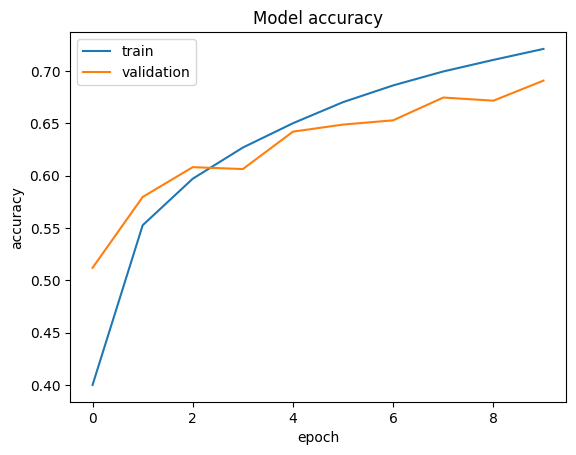

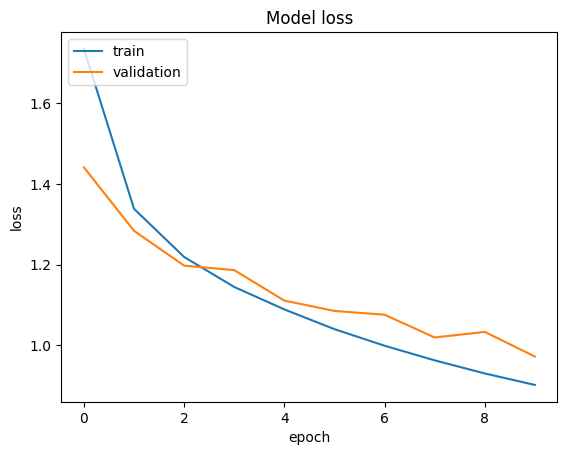

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


<Axes: >

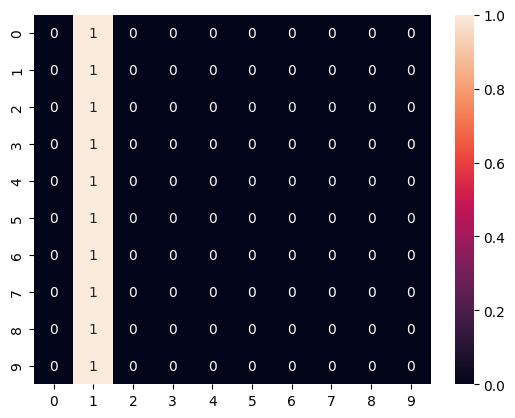

In [ ]:
y_pred = model_cnn.predict(test_images)
y_pred_classes = np.argmax(y_pred,axis = 1)

y_test_classes = np.argmax(test_labels,axis = 1)

sns.heatmap(sklearn.metrics.confusion_matrix(y_test_classes, y_pred_classes, normalize="true"), annot=True)

In [ ]:
def model_cnn2():
    model = Sequential()

    # Première couche convolutive avec 32 filtres et une taille de noyau de 3x3
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = RMSprop(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Affichage du résumé du modèle
    model.summary()

    return model


In [ ]:
model_cnn2 = model_cnn2()
history2 = model_cnn2.fit(train_images, train_labels, validation_split=0.2, epochs=10, batch_size=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - accuracy: 0.4651 - loss: 1.5624 - val_accuracy: 0.8288 - val_loss: 0.5439
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 44s 92ms/step - accuracy: 0.8292 - loss: 0.5377 - val_accuracy: 0.8921 - val_loss: 0.3513
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - accuracy: 0.8904 - loss: 0.3484 - val_accuracy: 0.9188 - val_loss: 0.2621
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.9184 - loss: 0.2627 - val_accuracy: 0.9215 - val_loss: 0.2503
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 44s 92ms/step - accuracy: 0.9338 - loss: 0.2151 - val_accuracy: 0.9370 - val_loss: 0.2102
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.9387 - loss: 0.1930 - val_accuracy: 0.9367 - val_loss: 0.2041
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 84s 91ms/step - accuracy: 0.9485 - loss: 0.1626 - val_accuracy: 0.9420 - val_loss: 0.1903
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - accuracy: 0.9535 - loss: 0.1444 - 

In [ ]:
scores_train2 = model_cnn2.evaluate(train_images, train_labels)
scores2 = model_cnn2.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores_train2[1]*100))
print("Neural network accuracy: %.2f%%" % (scores2[1]*100))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9848 - loss: 0.0515
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0941 - loss: 2.3220
Neural network accuracy: 97.81%
Neural network accuracy: 9.74%


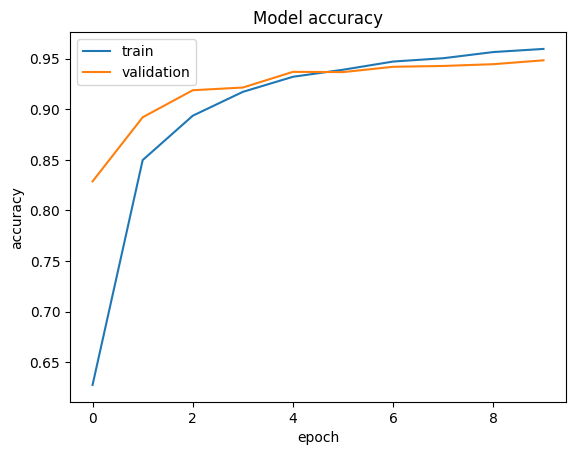

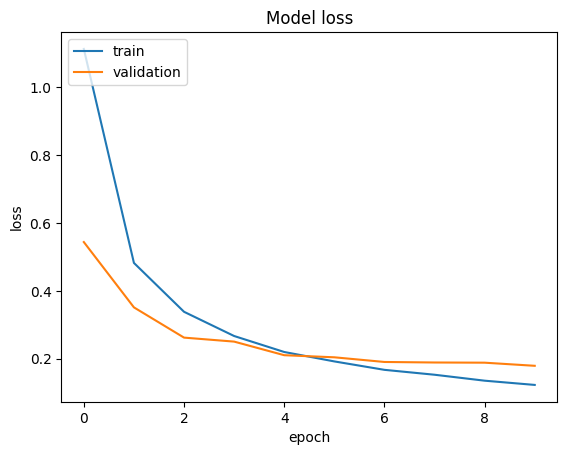

In [ ]:
#  "Accuracy"
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


<Axes: >

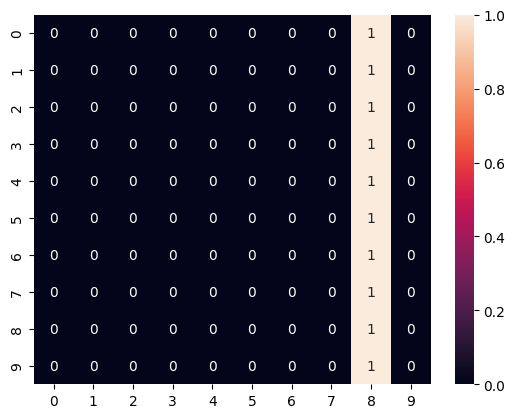

In [ ]:
y_pred2 = model_cnn2.predict(test_images)
y_pred_classes2 = np.argmax(y_pred2,axis = 1)

y_test_classes2 = np.argmax(test_labels,axis = 1)

sns.heatmap(sklearn.metrics.confusion_matrix(y_test_classes2, y_pred_classes2, normalize="true"), annot=True)

In [ ]:
from sklearn.model_selection import KFold

def k_fold_cross_validation(X, y, k=5, epochs=10, batch_size=100):
    kfold = KFold(n_splits=k, shuffle=True, random_state=3)
    accuracy_per_fold = []
    fold_no = 1

    # Pour stocker les historiques de chaque pli
    all_acc = []
    all_val_acc = []
    all_loss = []
    all_val_loss = []

    for train_index, val_index in kfold.split(X):
        # Créer le modèle pour chaque pli
        model = model_cnn2()

        print(f'Entraînement du fold {fold_no}...')

        # Séparer les données d'entraînement et de validation
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        # Entraînement du modèle sur les données d'entraînement du pli
        history = model.fit(X_train_fold, y_train_fold,
                            validation_data=(X_val_fold, y_val_fold),
                            epochs=epochs,
                            batch_size=batch_size)

        # Sauvegarder les historiques pour chaque pli
        all_acc.append(history.history['accuracy'])
        all_val_acc.append(history.history['val_accuracy'])
        all_loss.append(history.history['loss'])
        all_val_loss.append(history.history['val_loss'])

        # Évaluer le modèle sur les données de validation du pli
        scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        print(f'Fold {fold_no} - Accuracy: {scores[1]*100:.2f}%')
        accuracy_per_fold.append(scores[1] * 100)

        fold_no += 1

    # Résultats
    print('\nScores de chaque fold:', accuracy_per_fold)
    print(f'Moyenne de l\'accuracy: {np.mean(accuracy_per_fold):.2f}%')
    print(f'Variance de l\'accuracy: {np.std(accuracy_per_fold):.2f}%')

    # Tracer les courbes d'accuracy et de loss pour tous les plis sur un seul graphique
    plt.figure(figsize=(10, 6))

    # Tracer accuracy pour tous les plis
    for i in range(k):
        plt.plot(all_val_acc[i], label=f'Validation Accuracy Fold {i+1}')

    # Ajouter les titres et les légendes
    plt.title('Training and Validation Accuracy per Fold')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Afficher le graphique
    plt.show()

    # Tracer les courbes de loss pour tous les plis sur un seul graphique
    plt.figure(figsize=(10, 6))

    # Tracer loss pour tous les plis
    for i in range(k):
        plt.plot(all_val_loss[i], label=f'Validation Loss Fold {i+1}', linestyle='--', marker='x')

    # Ajouter les titres et les légendes
    plt.title('Training and Validation Loss per Fold')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Afficher le graphique
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Entraînement du fold 1...
Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.5090 - loss: 1.4388 - val_accuracy: 0.8699 - val_loss: 0.4364
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.8569 - loss: 0.4525 - val_accuracy: 0.9032 - val_loss: 0.3148
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.9069 - loss: 0.2988 - val_accuracy: 0.9247 - val_loss: 0.2577
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.9228 - loss: 0.2420 - val_accuracy: 0.9305 - val_loss: 0.2330
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.9389 - loss: 0.1932 - val_accuracy: 0.9391 - val_loss: 0.2048
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9447 - loss: 0.1663 - val_accuracy: 0.9401 - val_loss: 0.2017
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.9519 - loss: 0.1502 - val_accuracy: 0.9476 - val_loss: 0.1818
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Entraînement du fold 2...
Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.4969 - loss: 1.4702 - val_accuracy: 0.8677 - val_loss: 0.4442
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.8566 - loss: 0.4581 - val_accuracy: 0.9062 - val_loss: 0.3003
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.8987 - loss: 0.3175 - val_accuracy: 0.9177 - val_loss: 0.2709
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.9219 - loss: 0.2428 - val_accuracy: 0.9346 - val_loss: 0.2185
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.9355 - loss: 0.2051 - val_accuracy: 0.9348 - val_loss: 0.2123
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.9446 - loss: 0.1751 - val_accuracy: 0.9455 - val_loss: 0.1782
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.9531 - loss: 0.1504 - val_accuracy: 0.9467 - val_loss: 0.1787
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Entraînement du fold 3...
Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.5086 - loss: 1.4369 - val_accuracy: 0.8654 - val_loss: 0.4463
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.8583 - loss: 0.4576 - val_accuracy: 0.9118 - val_loss: 0.2805
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.9016 - loss: 0.3171 - val_accuracy: 0.9277 - val_loss: 0.2399
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9245 - loss: 0.2387 - val_accuracy: 0.9356 - val_loss: 0.2051
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.9353 - loss: 0.2066 - val_accuracy: 0.9403 - val_loss: 0.1921
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.9442 - loss: 0.1802 - val_accuracy: 0.9412 - val_loss: 0.1926
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9535 - loss: 0.1487 - val_accuracy: 0.9482 - val_loss: 0.1685
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Entraînement du fold 4...
Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step - accuracy: 0.5010 - loss: 1.4464 - val_accuracy: 0.8751 - val_loss: 0.4192
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.8611 - loss: 0.4499 - val_accuracy: 0.9216 - val_loss: 0.2666
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9081 - loss: 0.2984 - val_accuracy: 0.9341 - val_loss: 0.2267
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9260 - loss: 0.2312 - val_accuracy: 0.9383 - val_loss: 0.2043
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.9397 - loss: 0.1920 - val_accuracy: 0.9392 - val_loss: 0.2053
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9463 - loss: 0.1683 - val_accuracy: 0.9457 - val_loss: 0.1871
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.9531 - loss: 0.1504 - val_accuracy: 0.9401 - val_loss: 0.2085
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Entraînement du fold 5...
Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.4879 - loss: 1.4870 - val_accuracy: 0.8659 - val_loss: 0.4511
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.8518 - loss: 0.4636 - val_accuracy: 0.8975 - val_loss: 0.3311
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.9057 - loss: 0.3054 - val_accuracy: 0.9238 - val_loss: 0.2446
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9245 - loss: 0.2381 - val_accuracy: 0.9312 - val_loss: 0.2187
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.9378 - loss: 0.1966 - val_accuracy: 0.9392 - val_loss: 0.2023
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.9432 - loss: 0.1808 - val_accuracy: 0.9465 - val_loss: 0.1816
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.9517 - loss: 0.1538 - val_accuracy: 0.9467 - val_loss: 0.1804
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy

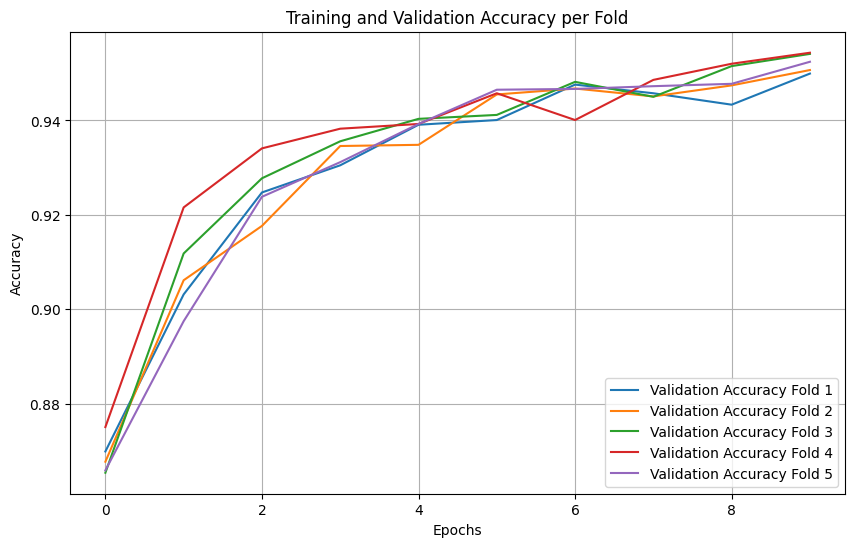

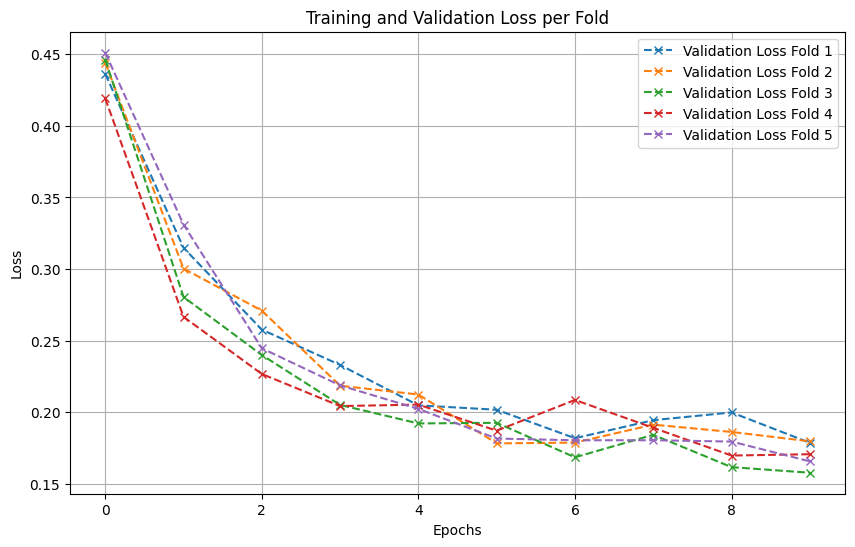

In [ ]:
k_fold_cross_validation(train_images, train_labels, k=5, epochs=10, batch_size=50)

Le réseau CNN a de meilleures performances que le DNN. Il est aussi robuste car d'après le k-fold l'échantillonage n'est pas à l'origine des bonnes performances obtenues avec le modèle.